In [13]:
from pylab import *
from scipy import signal
import numpy as np
import scipy.fftpack as fourier
from scipy.signal import butter, filtfilt, lfilter

from PyEMD import EMD
from PyEMD import EEMD

def highpass(s, cutoff, fs, order = 5):
    b, a = signal.butter(order, cutoff / (fs/2), btype='high', analog=False)
    return filtfilt(b, a, s)

def lowpass(s, f, fs, order=10):
    b, a = signal.butter(order, f / (fs/2))
    return lfilter(b, a, s)

def notchfilter(s, f, fs, Q = 12,):
    b, a = signal.iirnotch(f / (fs/2), Q)
    return lfilter(b, a, s)



In [14]:
#data = loadtxt("pruba_medida.txt")
data = loadtxt("ojos_cerrados_y_blinks_aluminio.txt")
fs=100
x = data[:, 5]
#tline = np.linspace(0, len(x), len(x)/fs)

xpa = highpass(x, 0.5, fs)
xpb = lowpass(xpa, 49, fs)
xf = notchfilter(xpb, 50, fs)
f, time, Zxx = signal.stft(xf, fs, nperseg=128)


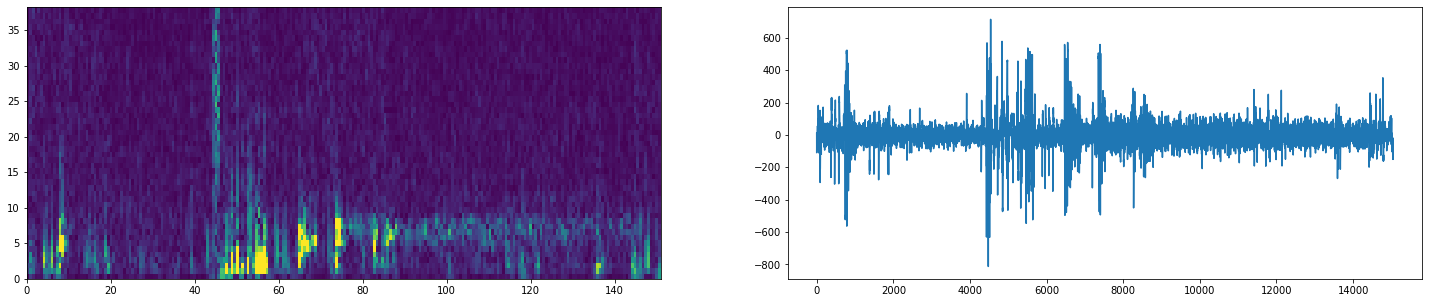

In [15]:
plt.figure(figsize=(25,5))
subplot(1,2,1)
pcolormesh(time, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)
subplot(1,2,2)
plot(xf)
show()

In [16]:
eemd = EEMD()
IMF = eemd.eemd(xf)
IMF.shape

(13, 15045)

In [17]:
nIMF = IMF.shape[0]+1

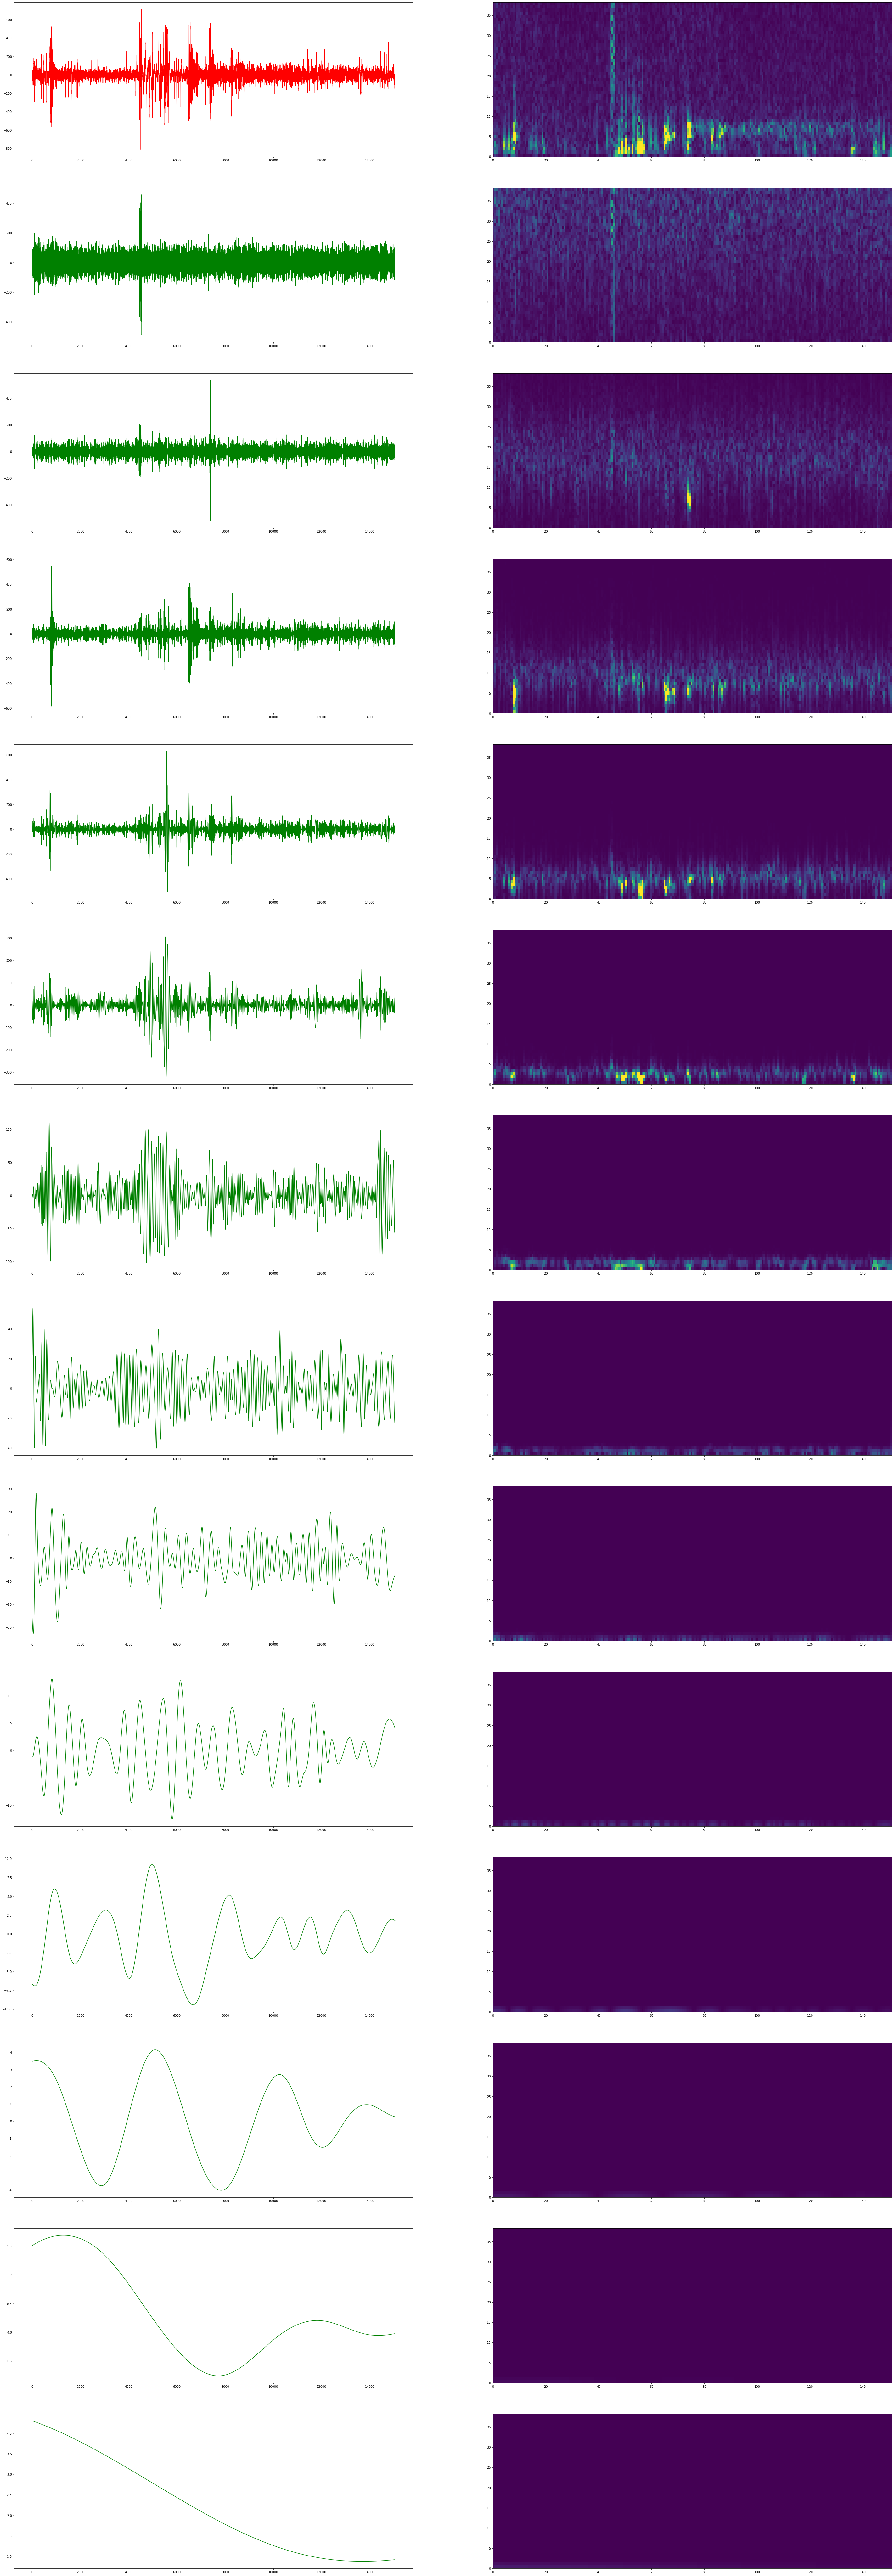

In [18]:
plt.figure(figsize=(50,150))
plt.subplot(nIMF,2,1)
plt.plot(xf, 'r')
plt.subplot(nIMF,2,2)
f, time, Zxx = signal.stft(xf, fs, nperseg=128)
pcolormesh(time, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)

for n, imf in enumerate(IMF):
    plt.subplot(nIMF, 2, (n+2)*2 -1)
    plt.plot(imf, 'g')
    #plt.title("IMF "+str(n+1))
    plt.subplot(nIMF, 2, (n+2)*2)
    f, time, Zxx = signal.stft(imf, fs, nperseg=128)
    pcolormesh(time, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)
    
plt.show()

In [7]:
IMFs = IMF[1:7,:]
IMFs.shape

(6, 15045)

In [8]:
xfRecomposed = sum(IMFs,0)

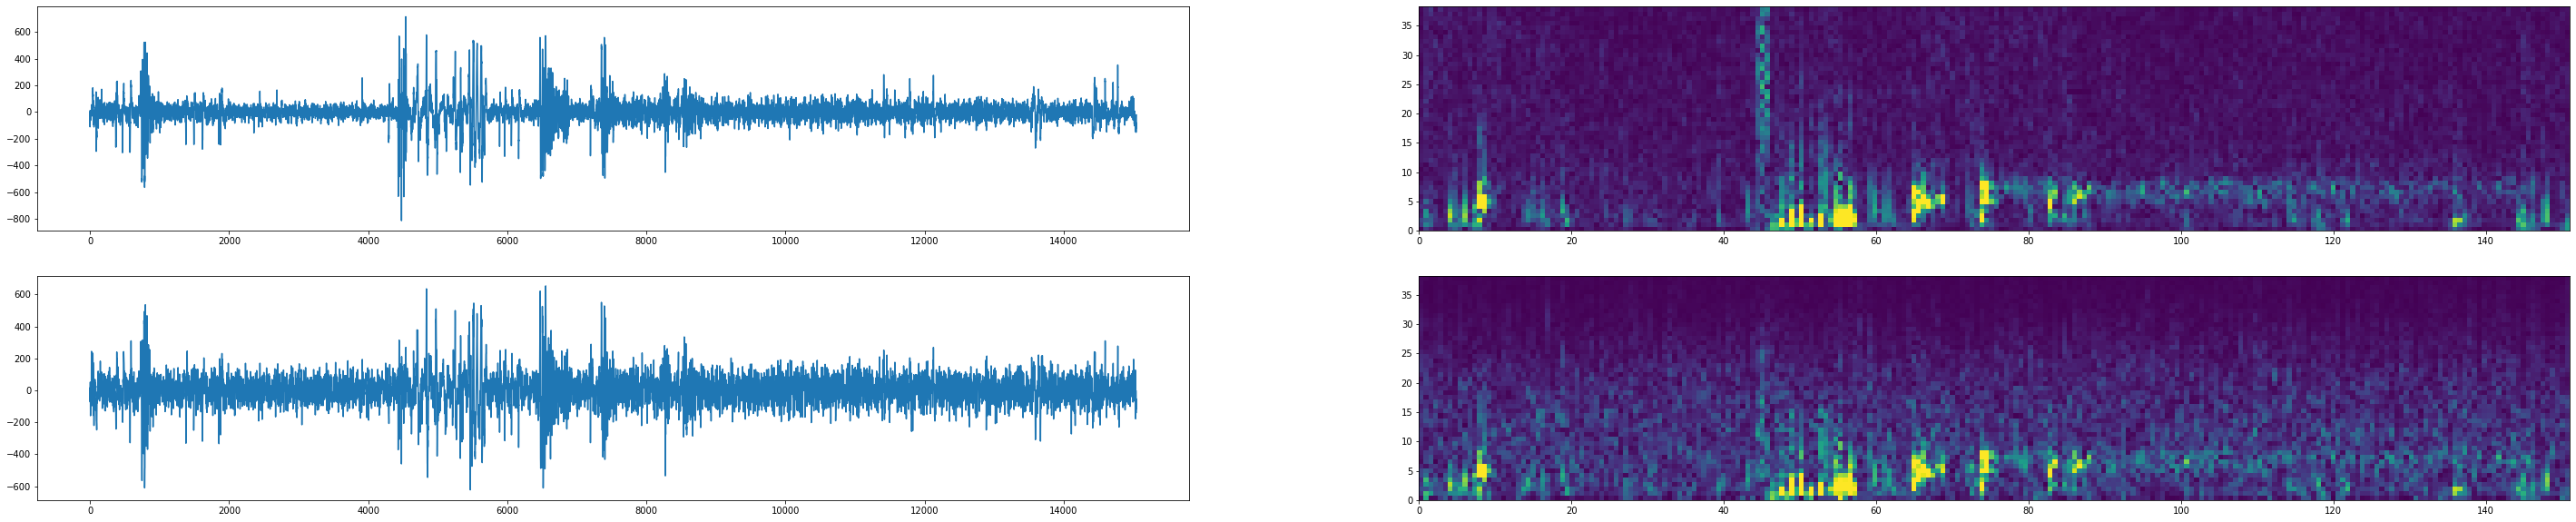

In [9]:
plt.figure(figsize=(50,10))
plt.subplot(2,2,1)
plot(xf)
plt.subplot(2,2,2)
f, time, Zxx = signal.stft(xf, fs, nperseg=128)
pcolormesh(time, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)

plt.subplot(2,2,3)
plot(xfRecomposed)
plt.subplot(2,2,4)
f, time, Zxx = signal.stft(xfRecomposed, fs, nperseg=128)
pcolormesh(time, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)

plt.show()

In [10]:
from sklearn.decomposition import FastICA

In [11]:
ica = FastICA(n_components=IMFs.shape[0])

In [12]:
S_ = ica.fit_transform(np.transpose(IMFs))
S_ = np.transpose(S_)
S_ = S_*10000
S_.shape

(6, 15045)

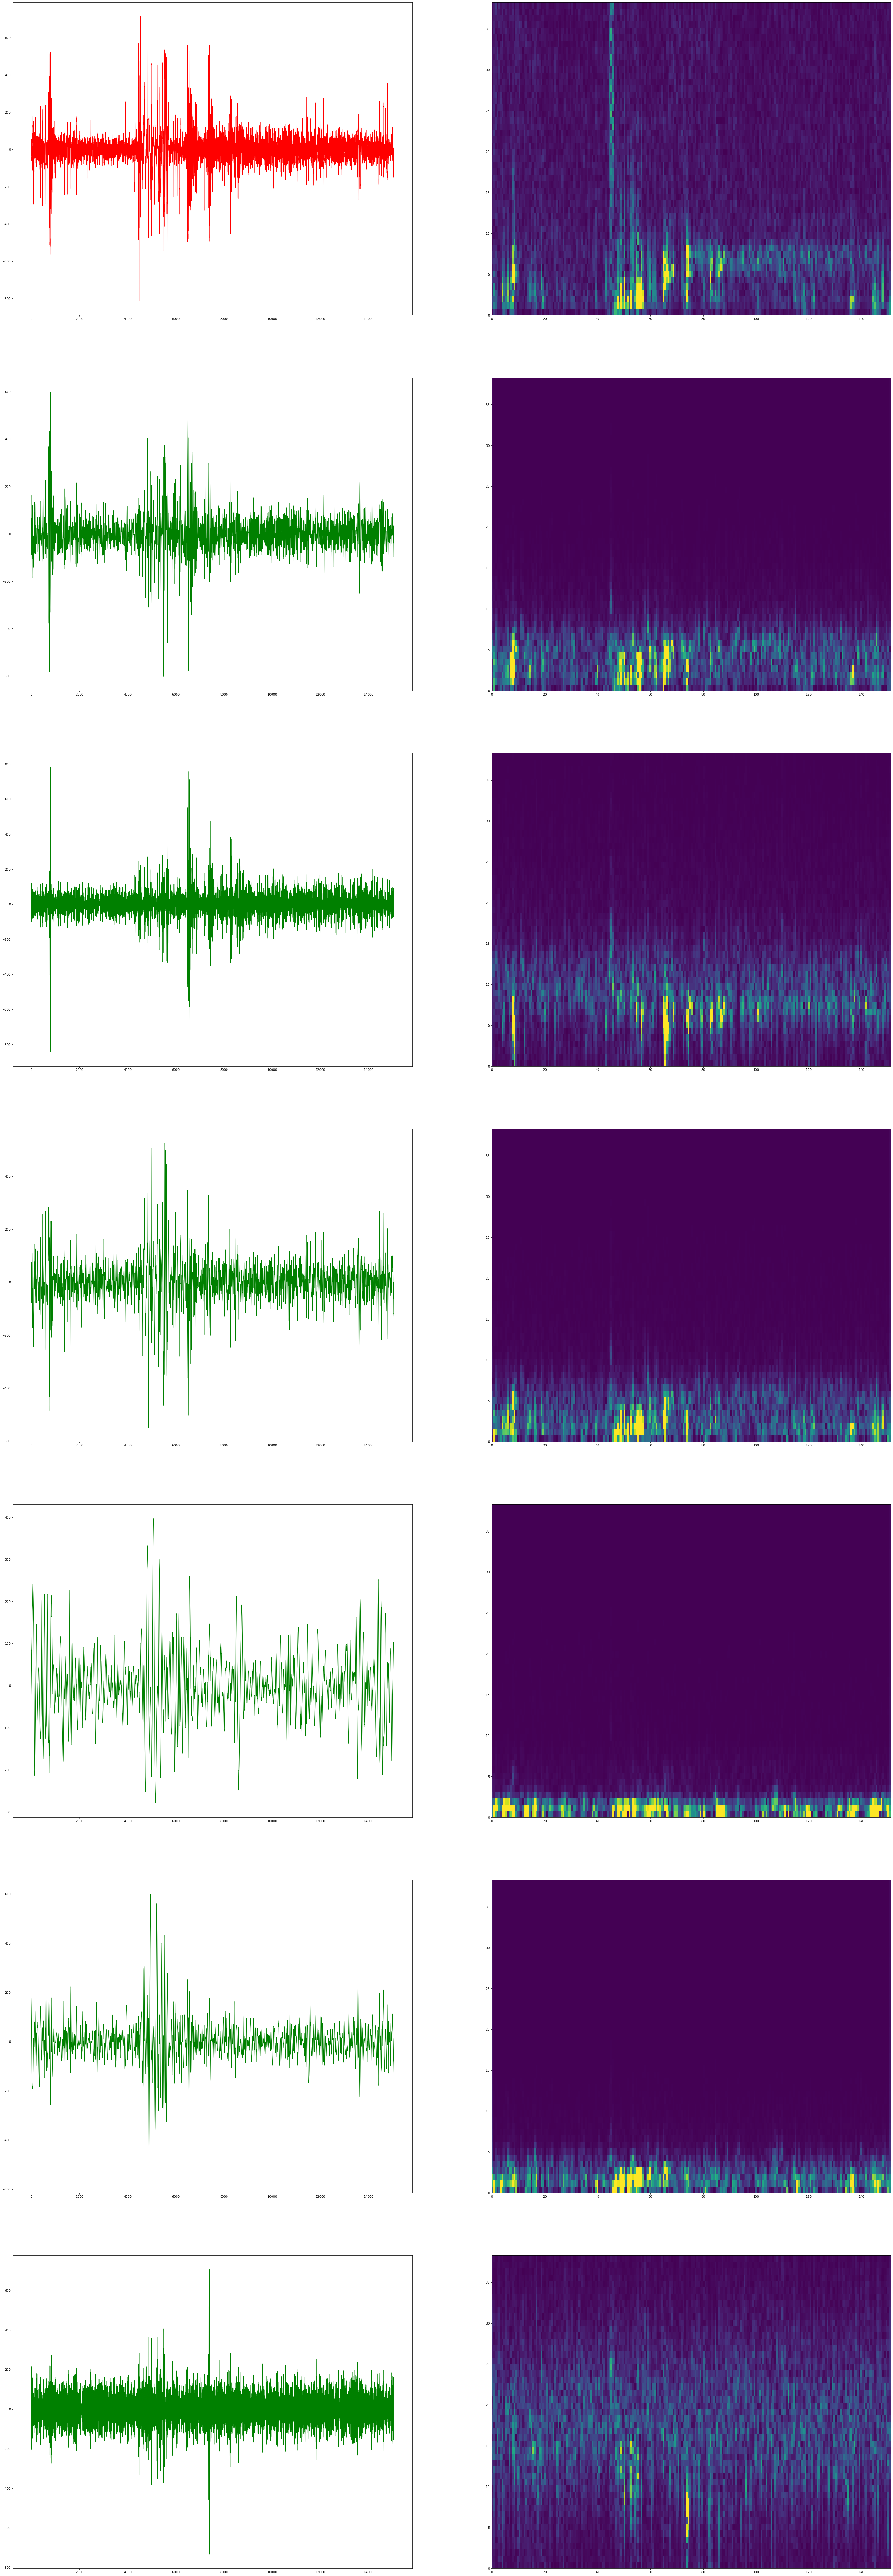

In [13]:
nrows = S_.shape[0]+1
plt.figure(figsize=(50,150))
plt.subplot(nrows,2,1)
plt.plot(xf, 'r')
plt.subplot(nrows,2,2)
f, time, Zxx = signal.stft(xf, fs, nperseg=128)
pcolormesh(time, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)

for n, s_ in enumerate(S_):
    plt.subplot(nrows, 2, (n+2)*2 -1)
    plt.plot(s_, 'g')
    plt.subplot(nrows, 2, (n+2)*2)
    f, time, Zxx = signal.stft(s_, fs, nperseg=128)
    pcolormesh(time, f[0:50], np.abs(Zxx)[0:50], vmin=0, vmax=60)
    
plt.show()